In [1]:
#import dependents
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import least_squares
pd.options.display.float_format = '{:,.3f}'.format
pd.get_option("display.max_columns")
import warnings
warnings.filterwarnings('ignore')

pd.set_option('max_columns', None)
pd.set_option('max_rows', None)
pd.set_option('max_colwidth', None)

import datetime

In [2]:
def cleanDF(df):
    df = df.drop(df[(df.year == 2020) & (df.quarter == 2)].index)
    df = df.drop(df[(df.year == 2020) & (df.quarter == 3)].index)
    df.index = range(0,len(df))
    #creat Vs
    df.rename(columns = {'Duration of job vacancy, all durations': 'all'}, inplace = True)
    df.rename(columns = {'Less than 15 days': 'a000b014'}, inplace = True)
    df.rename(columns = {'15 to 29 days': 'a015b029'}, inplace = True)
    df.rename(columns = {'30 to 59 days': 'a030b059'}, inplace = True)
    df.rename(columns = {'60 to 89 days': 'a060b089'}, inplace = True)
    df.rename(columns = {'90 days or more': 'a090binf'}, inplace = True)
    df.rename(columns = {'90 to 119 days': 'a090b119'}, inplace = True)
    df.rename(columns = {'120 days or more': 'a120binf'}, inplace = True)
    df['a000binf'] = df['a000b014'] + df['a015b029'] + df['a030b059'] + df['a060b089'] + df['a090binf']
    #rearrage columns:
    df = df[['t', 'year', 'quarter', 'all',
             'a000binf', 'a000b014', 'a015b029', 'a030b059', 'a060b089', 'a090binf', 'a090b119', 'a120binf']]
    return df

In [3]:
df_all = cleanDF(pd.read_csv('data/all.csv'))
#by occupation type
df_cultur = cleanDF(pd.read_csv('data/art culture recreation and sport.csv'))
df_buzfin = cleanDF(pd.read_csv('data/Business finance and administration.csv'))
df_social = cleanDF(pd.read_csv('data/education law and social community and government services.csv'))
df_health = cleanDF(pd.read_csv('data/Health.csv'))
df_manage = cleanDF(pd.read_csv('data/management.csv'))
df_manufa = cleanDF(pd.read_csv('data/manufacturing and utilities.csv'))
df_engine = cleanDF(pd.read_csv('data/Natural and applied sciences and related.csv'))
df_agricu = cleanDF(pd.read_csv('data/Natural resources agriculture and related production.csv'))
df_servic = cleanDF(pd.read_csv('data/Sales and service.csv'))
df_trades = cleanDF(pd.read_csv('data/Trades transport and equipment operators and related.csv'))
df_0class = cleanDF(pd.read_csv('data/Unclassified.csv'))
#by province
df_ON = cleanDF(pd.read_csv('data/pov_ON.csv'))
df_QC = cleanDF(pd.read_csv('data/pov_QC.csv'))
df_BC = cleanDF(pd.read_csv('data/pov_BC.csv'))
df_AB = cleanDF(pd.read_csv('data/pov_AB.csv'))
df_MB = cleanDF(pd.read_csv('data/pov_MB.csv'))
df_SK = cleanDF(pd.read_csv('data/pov_SK.csv'))

In [4]:
POV_list = ['ON', 'QC', 'BC', 'AB', 'MB', 'SK']
NOC_list = ['cultur', 'buzfin', 'social', 'health', 'manage', 'manufa', 
            'engine', 'agricu', 'servic', 'trades', '0class']
VacancyCharacteristics = POV_list + NOC_list

In [5]:
df_all.describe().iloc[:, 3:]
for i in VacancyCharacteristics:
    print('==================================================================================')
    df = globals()[f'df_{i}']
    print(i)
    display(df.describe().iloc[:, 3:])

ON


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,26.000,27.000,7.000,7.000
mean,"203,984.074","179,394.808","50,454.444","42,627.593","36,292.222","15,939.231","32,538.704","13,287.857","60,245.000"
std,"55,630.273","66,982.973","8,930.350","9,540.784","13,018.481","8,410.681","29,718.519","6,319.794","27,148.354"
min,"138,450.000","115,660.000","39,280.000","30,505.000","22,655.000","6,975.000","10,505.000","7,030.000","36,335.000"
25%,"172,280.000","141,103.750","45,067.500","36,737.500","28,822.500","10,942.500","15,772.500","7,842.500","37,797.500"
50%,"190,440.000","151,670.000","47,330.000","40,505.000","32,630.000","13,157.500","21,500.000","11,380.000","45,640.000"
75%,"208,612.500","183,353.750","53,897.500","44,312.500","36,652.500","16,413.750","35,140.000","18,012.500","82,752.500"
max,"348,260.000","348,260.000","72,390.000","71,500.000","72,265.000","39,635.000","121,535.000","22,895.000","98,640.000"


QC


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,27.000,27.000,27.000,27.000,27.000,27.000,7.000,7.000
mean,"115,140.556","101,717.037","22,645.000","21,005.741","20,178.889","9,998.704","27,888.704","11,129.286","63,669.286"
std,"55,486.314","59,293.690","5,111.649","6,994.821","10,401.922","7,676.359","31,630.686","3,764.295","24,062.571"
min,"52,205.000","44,170.000","15,540.000","11,045.000","7,965.000","2,720.000","4,705.000","6,235.000","38,960.000"
25%,"67,347.500","58,225.000","19,602.500","14,997.500","11,505.000","4,272.500","6,635.000","8,292.500","43,502.500"
50%,"114,215.000","87,170.000","21,565.000","19,670.000","18,615.000","7,760.000","15,690.000","10,750.000","53,070.000"
75%,"138,975.000","118,142.500","25,072.500","25,260.000","23,932.500","11,290.000","34,032.500","14,500.000","86,827.500"
max,"238,140.000","238,140.000","38,565.000","36,240.000","45,410.000","29,300.000","108,330.000","15,335.000","92,995.000"


BC


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,26.000,26.000,26.000,26.000,26.000,7.000,7.000
mean,"95,352.037","80,255.962","20,164.423","17,900.962","16,680.192","7,276.346","18,234.038","6,605.714","33,530.000"
std,"26,119.643","31,688.417","4,814.155","4,187.933","5,926.898","4,136.077","15,552.797","2,523.421","12,066.205"
min,"59,970.000","44,690.000","14,290.000","10,570.000","8,095.000","2,845.000","5,875.000","3,870.000","23,035.000"
25%,"72,895.000","57,611.250","17,680.000","15,523.750","12,083.750","3,882.500","7,891.250","4,710.000","23,740.000"
50%,"92,645.000","71,682.500","18,675.000","16,772.500","16,707.500","6,605.000","12,562.500","5,145.000","25,460.000"
75%,"106,002.500","90,002.500","21,342.500","19,568.750","18,250.000","8,447.500","24,263.750","9,170.000","44,770.000"
max,"157,575.000","157,570.000","37,790.000","30,055.000","31,565.000","17,680.000","58,665.000","9,465.000","49,195.000"


AB


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,26.000,27.000,26.000,26.000,7.000,7.000
mean,"56,904.444","47,630.962","16,015.000","11,543.846","9,297.963","3,480.192","7,308.077","2,953.571","11,051.429"
std,"14,246.583","16,538.848","3,604.195","3,561.544","3,529.517","1,755.554","5,454.494","2,003.511","5,038.001"
min,"39,150.000","29,180.000","11,705.000","6,990.000","4,505.000","1,965.000","3,315.000",865.000,"6,235.000"
25%,"46,907.500","37,140.000","12,830.000","9,255.000","7,345.000","2,536.250","4,266.250","1,587.500","7,045.000"
50%,"51,265.000","42,642.500","15,355.000","10,565.000","8,605.000","2,965.000","5,317.500","1,800.000","8,645.000"
75%,"62,205.000","48,478.750","17,702.500","12,607.500","9,667.500","3,658.750","7,152.500","4,300.000","15,030.000"
max,"88,165.000","88,165.000","24,945.000","20,870.000","19,120.000","9,020.000","24,565.000","6,235.000","18,330.000"


MB


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,26.000,26.000,26.000,26.000,7.000,7.000
mean,"15,682.778","13,896.154","4,267.963","2,928.462","2,424.038","1,178.269","3,112.115","1,295.714","4,967.143"
std,"4,482.703","5,496.103",928.784,981.111,"1,093.675",709.332,"2,335.361",556.503,"1,680.625"
min,"10,495.000","7,870.000","2,830.000","1,890.000","1,330.000",305.000,585.000,670.000,"3,150.000"
25%,"13,252.500","10,451.250","3,545.000","2,403.750","1,767.500",660.000,"1,202.500",915.000,"3,957.500"
50%,"14,835.000","12,172.500","4,325.000","2,635.000","2,105.000","1,067.500","2,710.000","1,125.000","4,270.000"
75%,"16,477.500","16,108.750","4,917.500","2,952.500","2,687.500","1,398.750","4,375.000","1,645.000","5,845.000"
max,"27,520.000","27,520.000","6,825.000","6,070.000","5,085.000","3,055.000","9,170.000","2,155.000","7,745.000"


SK


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,26.000,27.000,7.000,7.000
mean,"11,937.593","10,438.654","3,597.222","2,372.222","1,809.815",773.269,"1,889.815",752.143,"3,255.714"
std,"3,570.966","4,170.190",926.125,796.530,832.595,416.622,"1,537.765",255.096,"1,462.502"
min,"8,435.000","6,830.000","2,350.000","1,385.000","1,090.000",365.000,835.000,480.000,"1,730.000"
25%,"9,400.000","7,483.750","2,897.500","1,900.000","1,350.000",511.250,997.500,582.500,"2,117.500"
50%,"10,775.000","9,002.500","3,545.000","2,085.000","1,490.000",675.000,"1,190.000",630.000,"2,505.000"
75%,"11,970.000","11,298.750","4,015.000","2,602.500","1,810.000",752.500,"2,142.500",897.500,"4,602.500"
max,"20,325.000","20,330.000","6,230.000","4,190.000","4,360.000","1,955.000","6,310.000","1,195.000","5,115.000"


cultur


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,26.000,26.000,26.000,26.000,26.000,7.000,7.000
mean,"11,074.444","10,076.154","2,988.846","2,510.769","2,310.769",856.346,"1,409.423",584.286,"1,987.857"
std,"2,874.381","3,141.618",863.009,676.155,733.133,535.822,"1,032.269",308.064,943.521
min,"6,560.000","5,840.000","1,605.000","1,465.000","1,215.000",210.000,325.000,200.000,880.000
25%,"8,655.000","7,683.750","2,411.250","1,878.750","1,801.250",422.500,740.000,330.000,"1,260.000"
50%,"10,600.000","9,465.000","2,820.000","2,622.500","2,227.500",692.500,"1,060.000",645.000,"1,675.000"
75%,"12,895.000","11,638.750","3,518.750","3,175.000","2,738.750","1,076.250","1,827.500",795.000,"2,780.000"
max,"16,450.000","16,450.000","4,850.000","3,690.000","4,265.000","2,165.000","3,975.000",995.000,"3,280.000"


buzfin


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,27.000,26.000,7.000,7.000
mean,"57,583.148","55,726.923","17,609.074","13,384.630","11,562.037","4,828.333","7,932.308","3,388.571","10,337.143"
std,"17,020.437","18,219.572","4,068.050","3,473.372","4,343.680","2,499.413","4,656.165","1,057.866","3,831.737"
min,"35,355.000","33,200.000","12,055.000","9,300.000","6,350.000","2,235.000","2,325.000","2,355.000","6,320.000"
25%,"46,217.500","43,201.250","15,237.500","11,275.000","8,562.500","3,000.000","4,916.250","2,537.500","7,400.000"
50%,"55,880.000","53,410.000","16,155.000","12,865.000","10,900.000","4,345.000","7,135.000","3,050.000","8,455.000"
75%,"60,787.500","60,053.750","18,322.500","13,822.500","12,480.000","5,482.500","9,056.250","4,215.000","13,450.000"
max,"102,715.000","102,715.000","28,715.000","23,050.000","23,040.000","11,385.000","20,695.000","4,810.000","15,885.000"


social


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,26.000,26.000,26.000,26.000,7.000,7.000
mean,"32,387.407","28,590.000","7,889.444","6,651.538","5,504.423","2,243.846","6,230.962","2,430.714","13,939.286"
std,"12,933.588","14,623.599","2,056.724","1,957.254","2,801.789","1,508.938","6,843.982",982.969,"4,383.224"
min,"18,555.000","14,530.000","5,000.000","4,045.000","2,585.000",705.000,"1,320.000","1,505.000","9,410.000"
25%,"21,122.500","18,238.750","6,442.500","5,208.750","3,246.250","1,150.000","1,770.000","1,705.000","10,965.000"
50%,"32,475.000","24,080.000","7,095.000","6,160.000","4,862.500","1,697.500","3,000.000","2,145.000","12,945.000"
75%,"35,772.500","33,863.750","8,835.000","7,423.750","6,713.750","2,671.250","9,182.500","3,010.000","15,850.000"
max,"66,975.000","66,970.000","13,125.000","10,775.000","12,765.000","6,065.000","25,525.000","3,935.000","21,590.000"


health


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,26.000,26.000,26.000,7.000,7.000
mean,"39,419.074","35,066.154","6,230.000","5,455.926","6,309.231","3,974.038","12,937.885","5,375.000","27,458.571"
std,"20,097.637","22,721.064","1,955.231","1,779.709","3,750.253","2,999.737","13,099.057","1,270.436","7,289.546"
min,"20,935.000","15,240.000","3,625.000","3,120.000","2,555.000","1,110.000","2,275.000","3,170.000","15,595.000"
25%,"23,695.000","18,793.750","4,902.500","4,147.500","3,437.500","1,720.000","3,882.500","4,655.000","23,372.500"
50%,"34,190.000","26,055.000","5,515.000","4,940.000","4,970.000","2,957.500","7,112.500","6,005.000","26,940.000"
75%,"42,425.000","40,488.750","7,412.500","6,610.000","6,858.750","5,692.500","16,282.500","6,335.000","33,912.500"
max,"82,830.000","82,830.000","12,485.000","9,610.000","14,415.000","12,925.000","41,580.000","6,470.000","35,105.000"


manage


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,26.000,27.000,7.000,7.000
mean,"27,797.963","26,908.462","6,275.556","5,980.741","6,406.296","3,111.346","5,014.074","1,965.000","5,223.571"
std,"5,137.601","5,643.095","1,203.489",970.270,"1,345.336",829.339,"1,773.843",592.790,"1,577.016"
min,"22,055.000","20,740.000","4,980.000","4,500.000","4,685.000","2,180.000","3,375.000","1,125.000","3,665.000"
25%,"24,450.000","23,018.750","5,425.000","5,452.500","5,312.500","2,557.500","3,810.000","1,607.500","3,950.000"
50%,"26,275.000","25,435.000","5,955.000","5,655.000","6,400.000","3,010.000","4,765.000","1,740.000","4,395.000"
75%,"29,010.000","27,698.750","6,582.500","6,292.500","6,717.500","3,211.250","5,542.500","2,507.500","6,705.000"
max,"41,645.000","41,645.000","9,795.000","8,160.000","9,685.000","5,275.000","9,855.000","2,660.000","7,195.000"


manufa


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,26.000,26.000,26.000,26.000,26.000,7.000,7.000
mean,"28,322.407","23,275.000","5,213.846","5,164.038","4,541.538","2,099.615","6,255.962","2,160.000","15,331.429"
std,"10,793.686","13,065.987","1,231.853","1,377.101","2,014.850","1,674.505","7,863.121","1,172.416","6,295.255"
min,"13,910.000","9,875.000","3,305.000","2,540.000","1,815.000",670.000,670.000,825.000,"8,145.000"
25%,"20,672.500","15,605.000","4,362.500","4,283.750","3,048.750","1,025.000","1,926.250","1,060.000","10,762.500"
50%,"25,655.000","18,022.500","4,942.500","4,812.500","4,102.500","1,667.500","2,575.000","2,335.000","12,450.000"
75%,"30,397.500","23,360.000","5,967.500","5,842.500","5,411.250","2,301.250","7,630.000","3,127.500","20,450.000"
max,"53,625.000","53,625.000","8,865.000","8,255.000","9,690.000","6,690.000","27,355.000","3,585.000","24,300.000"


engine


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,26.000,27.000,7.000,7.000
mean,"38,210.000","35,849.615","7,110.000","7,789.815","8,725.370","4,347.308","7,518.333","3,768.571","9,959.286"
std,"12,909.296","14,070.399","2,089.384","2,326.811","3,242.543","2,154.455","4,690.039","1,095.912","3,797.459"
min,"23,110.000","19,785.000","4,265.000","4,720.000","4,735.000","1,975.000","2,860.000","2,200.000","6,430.000"
25%,"27,400.000","24,967.500","5,650.000","6,150.000","5,980.000","2,490.000","4,205.000","3,062.500","6,892.500"
50%,"38,720.000","34,297.500","6,395.000","7,245.000","8,240.000","3,857.500","6,710.000","3,835.000","8,195.000"
75%,"43,825.000","39,326.250","7,995.000","8,420.000","9,980.000","5,201.250","8,530.000","4,370.000","12,827.500"
max,"69,600.000","69,600.000","12,040.000","12,935.000","16,165.000","9,580.000","21,135.000","5,480.000","15,650.000"


agricu


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,25.000,26.000,26.000,26.000,25.000,26.000,6.000,7.000
mean,"18,867.222","15,123.200","4,369.808","3,037.308","2,863.654","1,291.800","3,335.192","1,175.000","6,323.571"
std,"4,369.914","5,391.882","1,350.542",914.585,"1,324.428",665.081,"2,777.009",347.549,"1,606.683"
min,"10,965.000","6,645.000","2,560.000",975.000,905.000,285.000,595.000,680.000,"4,550.000"
25%,"15,600.000","11,135.000","3,286.250","2,507.500","2,153.750",885.000,"1,303.750",993.750,"5,010.000"
50%,"18,995.000","14,610.000","4,187.500","3,187.500","2,595.000","1,205.000","2,490.000","1,175.000","5,725.000"
75%,"22,132.500","16,890.000","5,137.500","3,718.750","3,416.250","1,560.000","4,642.500","1,352.500","7,887.500"
max,"28,060.000","28,060.000","7,455.000","4,570.000","7,205.000","3,010.000","9,350.000","1,675.000","8,195.000"


servic


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,26.000,27.000,7.000,7.000
mean,"180,456.667","153,147.308","47,446.481","38,367.963","28,427.222","11,320.769","26,358.148","10,255.000","54,342.143"
std,"54,010.314","64,983.774","8,801.454","10,550.682","12,619.844","8,153.779","29,110.730","6,697.711","30,028.223"
min,"115,070.000","90,215.000","33,415.000","25,995.000","13,425.000","4,085.000","7,280.000","3,955.000","26,195.000"
25%,"146,017.500","114,413.750","40,527.500","32,290.000","21,257.500","7,107.500","11,735.000","4,907.500","31,532.500"
50%,"165,920.000","131,455.000","46,395.000","36,630.000","24,765.000","9,175.000","15,130.000","6,800.000","35,790.000"
75%,"189,720.000","145,987.500","50,510.000","40,287.500","29,162.500","10,556.250","23,935.000","15,672.500","77,480.000"
max,"338,115.000","338,115.000","71,235.000","75,370.000","69,335.000","37,915.000","120,250.000","19,870.000","100,385.000"


trades


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,27.000,26.000,27.000,27.000,27.000,26.000,26.000,7.000,7.000
mean,"89,110.185","72,460.000","18,090.741","14,451.852","13,600.926","6,317.692","19,626.346","6,604.286","42,298.571"
std,"32,203.132","38,660.573","4,684.393","5,108.362","6,089.871","4,288.205","20,812.823","3,052.586","16,831.964"
min,"44,765.000","30,015.000","11,170.000","7,220.000","5,825.000","1,840.000","3,770.000","3,380.000","26,920.000"
25%,"64,112.500","45,240.000","15,327.500","11,210.000","8,870.000","3,148.750","6,150.000","4,392.500","27,977.500"
50%,"83,960.000","59,220.000","17,040.000","13,655.000","12,240.000","5,192.500","12,405.000","4,790.000","33,255.000"
75%,"101,727.500","82,376.250","20,585.000","16,772.500","15,595.000","6,953.750","26,230.000","9,125.000","58,505.000"
max,"159,260.000","159,260.000","32,005.000","27,790.000","27,930.000","16,785.000","73,980.000","11,025.000","62,950.000"


0class


,all,a000binf,a000b014,a015b029,a030b059,a060b089,a090binf,a090b119,a120binf
count,14.000,4.000,7.000,6.000,8.000,6.000,5.000,0.000,1.000
mean,"6,614.643","10,320.000","3,190.000","3,256.667","1,763.125",621.667,740.000,NaN,230.000
std,"6,311.193","4,079.103","1,305.345","1,681.171",957.295,393.379,317.628,NaN,NaN
min,750.000,"7,430.000",695.000,"1,840.000",235.000,130.000,300.000,NaN,230.000
25%,"1,472.500","7,613.750","2,750.000","2,230.000","1,297.500",426.250,645.000,NaN,230.000
50%,"3,002.500","8,830.000","3,810.000","2,630.000","1,865.000",515.000,720.000,NaN,230.000
75%,"11,915.000","11,536.250","4,002.500","3,663.750","2,163.750",836.250,865.000,NaN,230.000
max,"19,370.000","16,190.000","4,320.000","6,335.000","3,135.000","1,230.000","1,170.000",NaN,230.000


Employing the steady-state assumption, we can model job vacancies over time as:
$$
v(t)=V_0q^t
$$
where $V_0$ is the inflow of new job vacancies created at $t=0$, and $q$ is the probability of a vacancy being filled during period $t$. The geometric series of the model would be:
$$
V_{a,b}=\sum_{t=a}^{b}v(t) \\
V_{a,b}={V_0q^a(1-q^b)\over1-q}
$$

In [6]:
def genDF0(df, df0, quarter):
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a000binf'],'a':float(0),'b':np.inf,'id':'a000binf'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a000b014'],'a':float(0),'b':float(14), 'id':'a000b014'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a015b029'],'a':float(15),'b':float(29),'id':'a015b029'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a030b059'],'a':float(30),'b':float(59),'id':'a030b059'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a060b089'],'a':float(60),'b':float(89),'id':'a060b089'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a090binf'],'a':float(90),'b':np.inf,'id':'a090binf'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a090b119'],'a':float(90),'b':float(119),'id':'a090b119'},ignore_index=True)
    df0 = df0.append({'year' : df.loc[quarter, 'year'], 'quarter' : df.loc[quarter, 'quarter'],
                      'V':df.loc[quarter,'a120binf'],'a':float(120),'b':np.inf,'id':'a120binf'},ignore_index=True)
    df0 = df0[df0['V'].notna()]
    df0['V'] = df0['V'].astype(float, errors='ignore')
    return df0

coeffs0 = [10000, 0.5] #initial guess
def fitting(df0, coeffs0):
    #fitting    v0 = coeffs[0] = , q = 1 - coeffs[1]
    a = df0['a'].to_numpy()
    b = df0['b'].to_numpy()
    v = df0['V'].to_numpy()
    def model(coeffs, a , b):
        zeroInf = coeffs[0] / (1 - coeffs[1])
        adj = (coeffs[1] ** a) * (1 - (coeffs[1] ** b))
        return zeroInf * adj
    def residual(coeffs):
        return model(coeffs, a , b) - v 
    fit = least_squares(residual, coeffs0)
    return fit

In [7]:
def NLS(df):
    df = df.copy()
    df0 = pd.DataFrame()
    for quarter in range(len(df)):
        df0 = genDF0(df, df0, quarter)
    #fitting    v0 = coeffs[0] = , q = 1 - coeffs[1]
    fit = fitting(df0, coeffs0) 
    #record
    v0 = fit.x[0]
    q = 1 - fit.x[1]
    ε = pd.Series(fit.fun)
    df0['ε'] = ε.values
    df['ε_a000binf'] = np.nan
    df['ε_a000b014'] = np.nan
    df['ε_a015b029'] = np.nan
    df['ε_a030b059'] = np.nan
    df['ε_a060b089'] = np.nan
    df['ε_a090binf'] = np.nan
    df['ε_a090b119'] = np.nan
    df['ε_a120binf'] = np.nan
    for i in range(len(df0)):
        ε_value = df0.loc[i, 'ε']
        year = df0.loc[i, 'year']
        quarter = df0.loc[i, 'quarter']
        id_name = df0.loc[i, 'id']
        df[f'ε_{id_name}'][(df["year"] == year) & (df["quarter"] == quarter)] = ε_value
    if q != 0.5:
        df['v0'] = v0
        df['q'] = q
    else:
        pass
    return df, v0 , q

In [8]:
def NLS_yearly(df):
    df = df.copy()
    df0 = pd.DataFrame()
    for year in range(2015, 2022+1 ,1):
        dfYEAR = df[(df['year'] == year)].copy()
        dfYEAR.index = range(0,len(dfYEAR))
        try:
            fit = NLS(dfYEAR) #[0]: table, [1]:V0, [2]: q
            dfYEAR = fit[0]
            df0 = df0.append(dfYEAR)
        except:
            pass
    return df0

In [9]:
def NLS_quarterly(df):
    df = df.copy()
    for quarter in range(len(df)):
        df0 = pd.DataFrame()
        df0 = genDF0(df, df0, quarter)
        #fitting    v0 = coeffs[0] = , q = 1 - coeffs[1]
        if len(df0.index) >= 2:
            fit = fitting(df0, coeffs0) 
        #record
            v0 = fit.x[0]
            q = 1- fit.x[1]
            if q != coeffs0[1]:
                df.loc[quarter, 'v0'] = v0
                df.loc[quarter, 'q'] = q
            else:
                pass
            idList = df0['id'].tolist()
            for i in range(len(fit.fun)):
                df.loc[quarter, f'ε1_{idList[i]}'] = fit.fun[i]
            df0 = df0.iloc[0:0] #clear df0
    return df

In [10]:
#fitting
fit_all = NLS(df_all) #[0]: table, [1]:V0, [2]: q
fitYear_all = NLS_yearly(df_all)
fitQuarter_all = NLS_quarterly(df_all)

In [11]:
def name(df):
    df = df.replace({'ON': 'Ontario', 'QC': 'Quebec', 'BC': 'British Columbia',
                     'AB': 'Alberta', 'MB': 'Manitoba', 'SK': 'Saskatchewan', 
                     'cultur': 'Art culture recreation and sport',
                     'buzfin': 'Business finance and administration',
                     'social': 'Education, law, social, community, and government services',
                     'health': 'Health',
                     'manage': 'Management',
                     'manufa': 'Manufacturing and utilities',
                     'engine': 'Natural and applied sciences and related',
                     'servic': 'Sales and service',
                     'trades': 'Trades transport and equipment operators and related',
                     '0class': 'Unclassified'})
    return df

In [12]:
def date(df):
    df = df.copy()
    df['quarter'] = df['quarter'].replace({1: '-01-01',
                                           2: '-04-01',
                                           3: '-07-01',
                                           4: '-10-01'})
    df['year'] = df['year'].astype(str)
    df['date'] = df['year'] + df['quarter']
    df['date'] = pd.to_datetime(df['date'])
    df = df.drop(['t' , 'year', 'quarter'], axis=1)
    return df

# ALL FIT

In [13]:
#fitting
for i in VacancyCharacteristics:
    df = globals()[f'df_{i}']
    globals()[f'fitAll_{i}'] = NLS(df)

In [14]:
fitAll_result = pd.DataFrame()
fitAll_result = fitAll_result.append({'Vacancy Characteristics': 'All', 'v0': fit_all[1], 'q':fit_all[2],
                                      'ε_a000binf': fit_all[0]['ε_a000binf'].mean(),
                                      'ε_a000b014': fit_all[0]['ε_a000b014'].mean(),
                                      'ε_a015b029': fit_all[0]['ε_a015b029'].mean(),
                                      'ε_a030b059': fit_all[0]['ε_a030b059'].mean(),
                                      'ε_a060b089': fit_all[0]['ε_a060b089'].mean(),
                                      'ε_a090binf': fit_all[0]['ε_a090binf'].mean(),
                                      'ε_a090b119': fit_all[0]['ε_a090b119'].mean(),
                                      'ε_a120binf': fit_all[0]['ε_a120binf'].mean()
                                     }, ignore_index=True)
#result table
for j in VacancyCharacteristics:
    fit = globals()[f'fitAll_{j}']
    fitAll_result = fitAll_result.append({'Vacancy Characteristics': j, 'v0': fit[1], 'q':fit[2],
                                          'ε_a000binf': fit[0]['ε_a000binf'].mean(),
                                          'ε_a000b014': fit[0]['ε_a000b014'].mean(),
                                          'ε_a015b029': fit[0]['ε_a015b029'].mean(),
                                          'ε_a030b059': fit[0]['ε_a030b059'].mean(),
                                          'ε_a060b089': fit[0]['ε_a060b089'].mean(),
                                          'ε_a090binf': fit[0]['ε_a090binf'].mean(),
                                          'ε_a090b119': fit[0]['ε_a090b119'].mean(),
                                          'ε_a120binf': fit[0]['ε_a120binf'].mean()
                                         }, ignore_index=True)

fitAll_result = name(fitAll_result)
fitAll_result = fitAll_result.set_index(['Vacancy Characteristics'])
display(fitAll_result)
fitAll_result.to_excel("Table5-1.xlsx")  

,q,v0,ε_a000b014,ε_a000binf,ε_a015b029,ε_a030b059,ε_a060b089,ε_a090b119,ε_a090binf,ε_a120binf
Vacancy Characteristics,,,,,,,,,,
All,0.020,"8,442.220","-20,769.568","-39,105.339","33,298.261","67,054.411","61,825.132","22,322.044","-30,047.967","-151,909.143"
Ontario,0.025,"4,045.769","-2,045.046","-15,115.165","15,550.089","23,602.692","16,858.854","3,231.805","-15,123.190","-52,002.598"
Quebec,0.010,946.786,"-10,242.879","-9,909.655",-601.358,"10,598.422","19,699.119","14,467.848","8,226.953","-37,206.545"
British Columbia,0.017,"1,246.234","-4,525.105","-7,174.056","4,274.028","11,130.424","13,128.759","6,929.907","-2,690.982","-24,252.194"
Alberta,0.034,"1,515.699","1,055.248","-3,569.294","5,075.206","4,164.020","1,674.528","-1,095.590","-5,420.804","-10,391.101"
Manitoba,0.023,286.568,-795.569,"-1,224.267","1,431.284","2,301.276","1,614.446",215.198,"-1,494.883","-4,152.909"
Saskatchewan,0.035,334.442,158.207,-850.969,"1,246.375","1,088.019",317.412,-365.300,"-1,497.231","-3,120.402"
Art culture recreation and sport,0.029,273.157,187.115,-733.663,943.703,858.897,606.188,43.349,-762.864,"-1,722.403"
Business finance and administration,0.032,"1,627.013","1,026.383","-4,340.563","5,854.670","5,078.259","2,201.379",-610.668,"-5,092.681","-9,255.545"


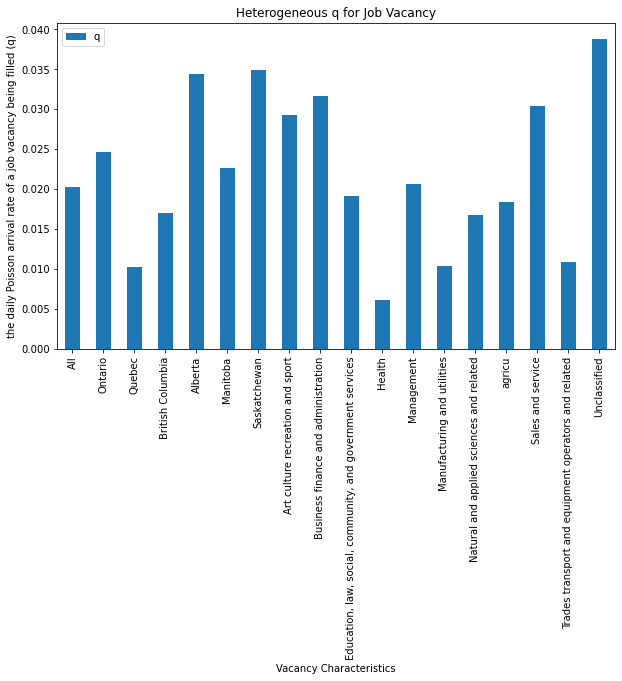

In [15]:
plt.rcParams["figure.figsize"] = [10, 6]
fitAll_result[['q']].plot(kind="bar")
plt.xlabel("Vacancy Characteristics")
plt.ylabel("the daily Poisson arrival rate of a job vacancy being filled (q)")
plt.title("Heterogeneous q for Job Vacancy")
plt.show()

# Yearly FIT

In [16]:
#fitting
for i in VacancyCharacteristics:
    df = globals()[f'df_{i}']
    globals()[f'fitYear_{i}'] = NLS_yearly(df)

In [17]:
describeYEARLY = pd.DataFrame()
df = fitYear_all
for year in range(2015, 2022 + 1, 1):
    dfYEAR = df[(df['year'] == year)].copy()
    dfYEAR.index = range(0,len(dfYEAR))
    dfYEAR = dfYEAR.describe().iloc[:, 12:].loc[['mean']]
    dfYEAR['Vacancy Characteristics'] = "All"
    dfYEAR['year'] = year
    dfYEAR = dfYEAR.set_index(['Vacancy Characteristics', 'year'])
    describeYEARLY = describeYEARLY.append(dfYEAR)
for i in VacancyCharacteristics:
    df = globals()[f'fitYear_{i}']
    for year in range(2015, 2022 + 1, 1):
        dfYEAR = df[(df['year'] == year)].copy()
        dfYEAR.index = range(0,len(dfYEAR))
        dfYEAR = dfYEAR.describe().iloc[:, 12:].loc[['mean']]
        dfYEAR['Vacancy Characteristics'] = i
        dfYEAR['year'] = year
        dfYEAR = name(dfYEAR)
        dfYEAR = dfYEAR.set_index(['Vacancy Characteristics', 'year'])
        describeYEARLY = describeYEARLY.append(dfYEAR)
describeYEARLY = describeYEARLY[['v0', 'q', 'ε_a000binf', 'ε_a000b014', 'ε_a015b029', 'ε_a030b059', 
                                 'ε_a060b089', 'ε_a090binf', 'ε_a090b119', 'ε_a120binf']]
describeYEARLY

v0  \
Vacancy Characteristics                                    year              
All                                                        2015 11,658.358   
                                                           2016 10,708.255   
                                                           2017 10,900.463   
                                                           2018 10,760.883   
                                                           2019 10,862.568   
                                                           2020  7,790.837   
                                                           2021  8,781.497   
                                                           2022  7,283.593   
Ontario                                                    2015  4,761.481   
                                                           2016  4,478.143   
                                                           2017  4,529.475   
                                                           2018  4,409.801   
                                                           2019  4,424.113   
                                                           2020  4,182.545   
                                                           2021  3,918.668   
                                                           2022  3,485.243   
Quebec                                                     2015  1,885.256   
                                                           2016  1,902.542   
                                                           2017  1,942.369   
                                                           2018  1,946.792   
                                                           2019  1,934.820   
                                                           2020  1,218.213   
                                                           2021  1,357.442   
                                                           2022  1,166.800   
British Columbia                                           2015  1,746.078   
                                                           2016  1,770.856   
                                                           2017  1,699.234   
                                                           2018  1,619.752   
                                                           2019  1,769.561   
                                                           2020  1,023.674   
                                                           2021  1,439.755   
                                                           2022  1,136.974   
Alberta                                                    2015  1,599.631   
                                                           2016  1,286.388   
                                                           2017  1,458.602   
                                                           2018  1,512.289   
                                                           2019  1,392.459   
                                                           2020  1,627.028   
                                                           2021  1,771.712   
                                                           2022  1,305.763   
Manitoba                                                   2015    437.690   
                                                           2016    395.680   
                                                           2017    364.668   
                                                           2018    299.261   
                                                           2019    350.919   
                                                           2020    243.425   
                                                           2021    322.837   
                                                           2022    262.102   
Saskatchewan                                               2015    325.091   
                                                           2016    292.418   
                

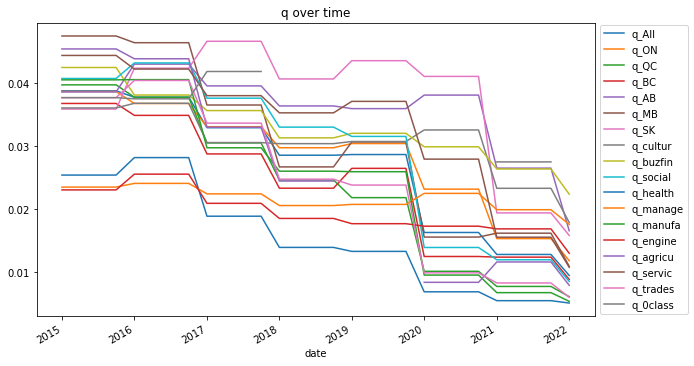

In [18]:
plot_year = pd.DataFrame()
plot_year_all = date(fitYear_all)[['date','q']].copy().set_index(['date'])
plot_year_all = plot_year_all.rename({'q': 'q_All'}, axis='columns')
plot_year = plot_year.append(plot_year_all)
for i in VacancyCharacteristics:
    df = globals()[f'fitYear_{i}']
    df = date(df).set_index(['date'])
    df = df[['q']]
    df = df.rename({'q': f'q_{i}'}, axis='columns')
    plot_year =pd.merge(plot_year, df, on = "date", how = "outer")
plot_year.plot()
plt.title('q over time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

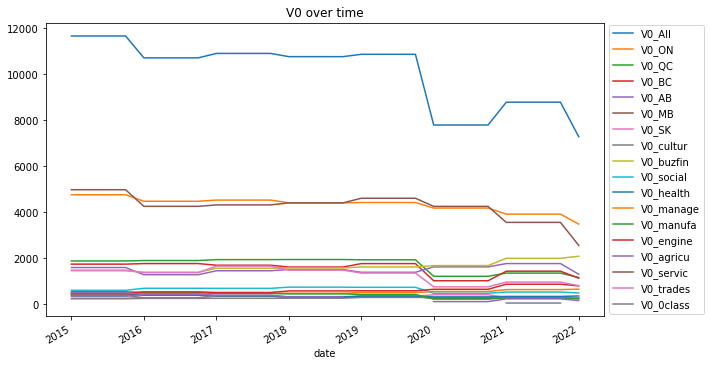

In [19]:
plot_year = pd.DataFrame()
plot_year_all = date(fitYear_all)[['date','v0']].copy().set_index(['date'])
plot_year_all = plot_year_all.rename({'v0': 'V0_All'}, axis='columns')
plot_year = plot_year.append(plot_year_all)
for i in VacancyCharacteristics:
    df = globals()[f'fitYear_{i}']
    df = date(df).set_index(['date'])
    df = df[['v0']]
    df = df.rename({'v0': f'V0_{i}'}, axis='columns')
    plot_year =pd.merge(plot_year, df, on = "date", how = "outer")
plot_year.plot()
plt.title('V0 over time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Quarterly FIT

In [20]:
#fitting
for i in VacancyCharacteristics:
    df = globals()[f'df_{i}']
    globals()[f'fitQuarter_{i}'] = NLS_quarterly(df)

In [21]:
describeQUARTERLY = pd.DataFrame()
for i in VacancyCharacteristics:
    df = globals()[f'fitQuarter_{i}']
    df = df.describe().iloc[:, 12:]
    df = df.loc[['mean']]
    df['Vacancy Characteristics'] = i
    df = df.set_index('Vacancy Characteristics')
    describeQUARTERLY = describeQUARTERLY.append(df)
#describeQUARTERLY

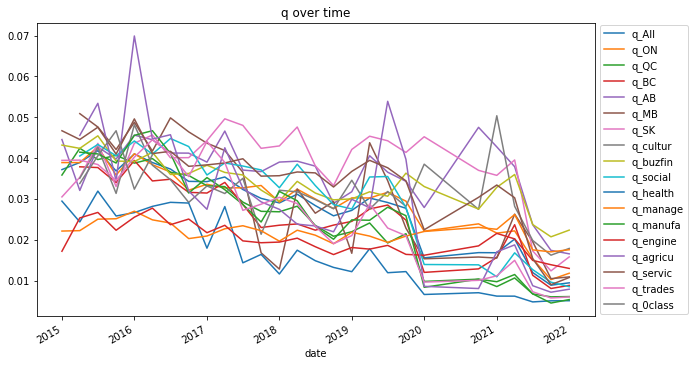

In [22]:
plot_quarter = pd.DataFrame()
plot_quarter_all = date(fitQuarter_all)[['date','q']].copy().set_index(['date'])
plot_quarter_all = plot_quarter_all.rename({'q': 'q_All'}, axis='columns')
plot_quarter = plot_quarter.append(plot_quarter_all)
for i in VacancyCharacteristics:
    df = globals()[f'fitQuarter_{i}']
    df = date(df).set_index(['date'])
    df = df[['q']]
    df = df.rename({'q': f'q_{i}'}, axis='columns')
    plot_quarter =pd.merge(plot_quarter, df, on = "date", how = "outer")
plot_quarter.plot()
plt.title('q over time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

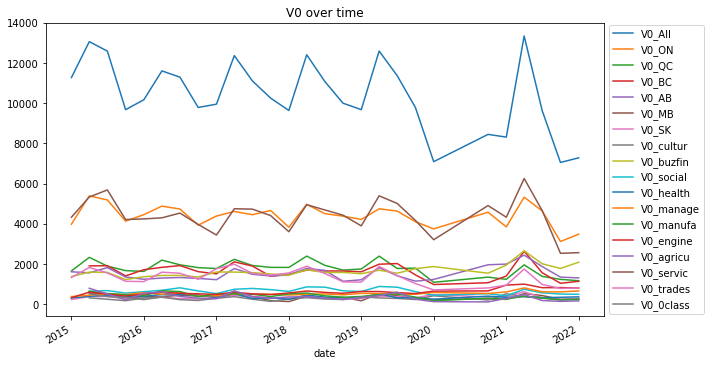

In [23]:
plot_quarter = pd.DataFrame()
plot_quarter_all = date(fitQuarter_all)[['date','v0']].copy().set_index(['date'])
plot_quarter_all = plot_quarter_all.rename({'v0': 'V0_All'}, axis='columns')
plot_quarter = plot_quarter.append(plot_quarter_all)
for i in VacancyCharacteristics:
    df = globals()[f'fitQuarter_{i}']
    df = date(df).set_index(['date'])
    df = df[['v0']]
    df = df.rename({'v0': f'V0_{i}'}, axis='columns')
    plot_quarter =pd.merge(plot_quarter, df, on = "date", how = "outer")
plot_quarter.plot()
plt.title('V0 over time')
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# PLOTTING

In [24]:
def plot(df, year, quarter):
    plt.rcParams["figure.figsize"] = [10, 6]
    year = int(year)
    quarter = int(quarter)
    df = df[(df['year'] == year) & (df['quarter'] == quarter)]
    df.index = range(0,len(df))
    index = ['day 0-∞','day 00-14','day 15-29','day 30-59','day 60-89','day 90-∞','day 90 - 119','day 120-∞']
    obs = df[['a000binf','a000b014','a015b029','a030b059','a060b089','a090binf','a090b119','a120binf']].T
    obs['Time Interval'] = index
    obs.rename(columns = {0: 'observation'}, inplace = True)
    obs = obs.set_index('Time Interval')
    res = df[['ε_a000binf','ε_a000b014','ε_a015b029','ε_a030b059',
              'ε_a060b089','ε_a090binf','ε_a090b119','ε_a120binf']].T
    res['Time Interval'] = index
    res.rename(columns = {0: 'residual'}, inplace = True)
    res = res.set_index('Time Interval')
    df0 = pd.concat([obs, res], axis=1)    
    df0['model est.'] = df0['observation'] + df0['residual']
    #display and plot
    v0 = df.loc[0, 'v0']
    q = df.loc[0, 'q']
    df0 = df0[['observation', 'model est.', 'residual']]
    display(df0)
    print(f'V0={v0}, q={q}')
    df0.plot(kind="bar")
    plt.xticks(rotation=30, horizontalalignment="center")
    plt.xlabel("Time Interval")
    plt.ylabel("Job Vacancies")
    plt.title(f"Observation, Estimation, and Residual - {year} Q{quarter}")
    plt.show()

,observation,model est.,residual
Time Interval,,,
day 0-∞,"319,630.000","283,705.897","-35,924.103"
day 00-14,"113,035.000","118,153.364","5,118.364"
day 15-29,"87,695.000","107,106.128","19,411.128"
day 30-59,"59,525.000","80,209.682","20,684.682"
day 60-89,"21,595.000","27,284.662","5,689.662"
day 90-∞,"37,780.000","8,892.346","-28,887.654"
day 90 - 119,NaN,NaN,NaN
day 120-∞,NaN,NaN,NaN


V0=10708.25465301348, q=0.0377442088876645


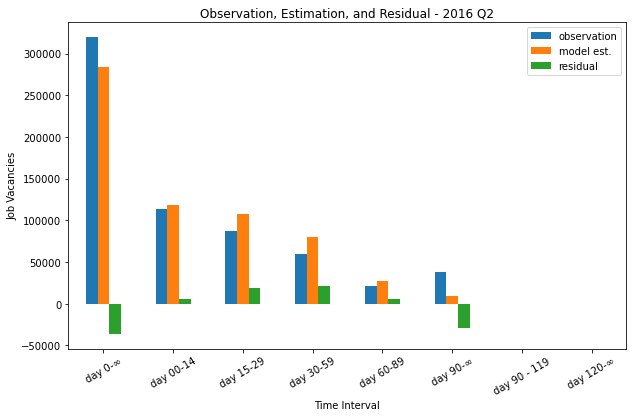

In [25]:
plot(fitYear_all, 2016, 2)

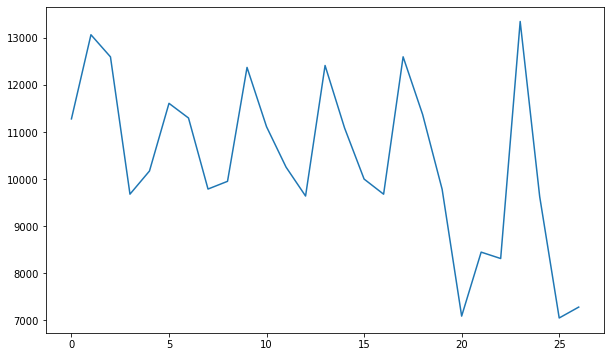

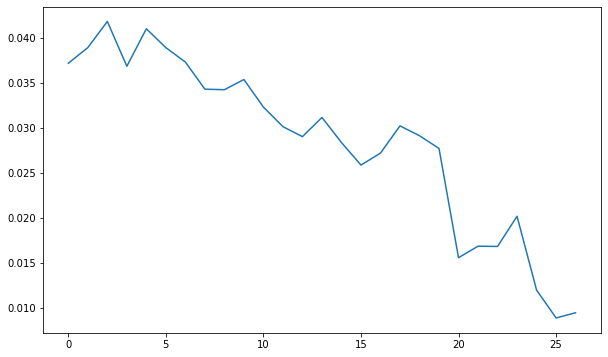

In [26]:
fitQuarter_all['v0'].plot.line()
plt.show()
fitQuarter_all['q'].plot.line()
plt.show()